# Loan Default Prediction Using Machine Learning Models

## Introduction

In this report, we will use data from a random sample of loans obtained from a peer-to-peer lending platform with the goal to predict who will default on its loan using features provided in the data. Various predictive models have been employed to identify the best model. The models considered are Linear Regression, Ridge Regression, Lasso Regression, Random Forest, and a Neural Network. Each model's performance has been evaluated based on Mean Squared Error (MSE), F1 Score, Recall, Precision, accuracy on both the training and test datasets.


In [1]:
import time
start = time.time()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,recall_score,f1_score,precision_score,accuracy_score,confusion_matrix
from sklearn.impute import SimpleImputer

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats




In [6]:
train_data = pd.read_csv('trainData.csv')
test_data = pd.read_csv('testData.csv')


y = train_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
y_test = test_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

numeric_col = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
                   'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
                   'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                   'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
                   'tot_cur_bal', 'total_rev_hi_lim']
categorical_col = ['grade', 'emp_length', 'home_ownership', 'application_type']


## Data Overview

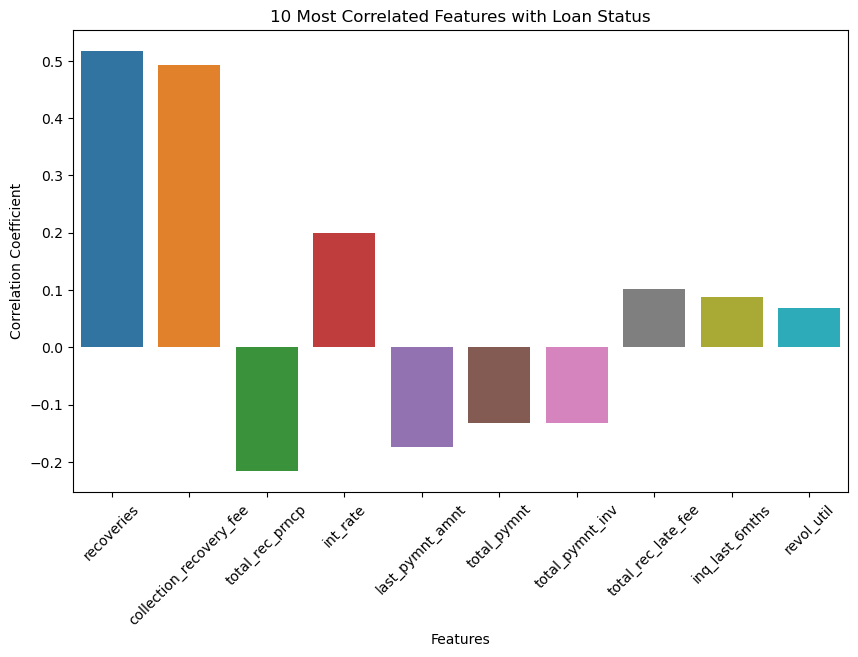

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation 
correlations = train_data[numeric_col].corrwith(y)

# 10 most correlated features
most_corr_features = correlations.abs().nlargest(10).index
most_corr_values = correlations[most_corr_features]

plt.figure(figsize=(10, 6))
sns.barplot(x=most_corr_values.index, y=most_corr_values.values)
plt.xticks(rotation=45)
plt.title('10 Most Correlated Features with Loan Status')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()



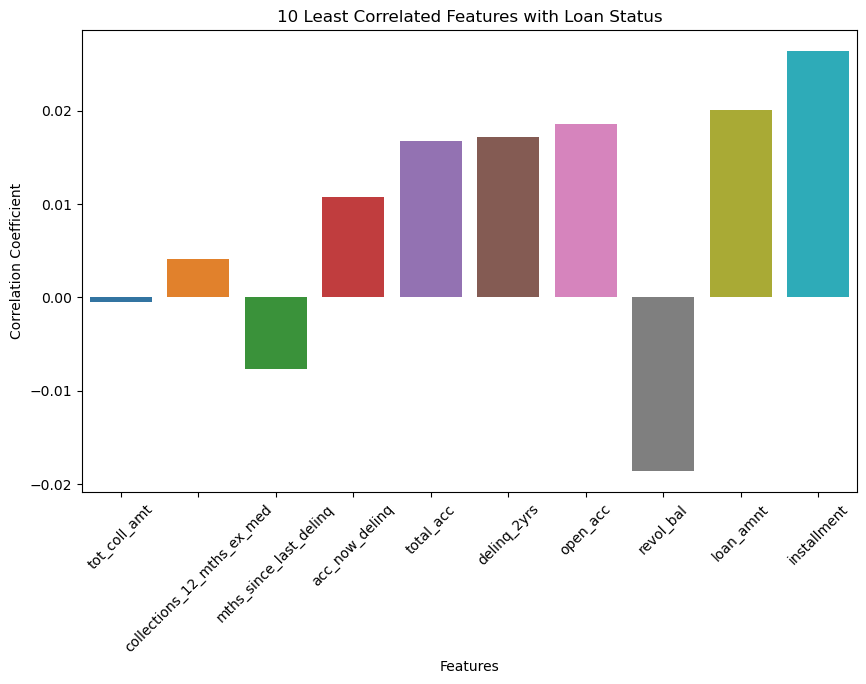

In [7]:

# 10 least correlated features
least_corr_features = correlations.abs().nsmallest(10).index
least_corr_values = correlations[least_corr_features]

plt.figure(figsize=(10, 6))
sns.barplot(x=least_corr_values.index, y=least_corr_values.values)
plt.xticks(rotation=45)
plt.title('10 Least Correlated Features with Loan Status')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

The analysis uses two datasets: one for training and one for testing. Both datasets have 226,067 rows and 33 columns. These columns include a mix of numeric and categorical data. Numeric data includes details like loan amount, interest rate, annual income, and various account and payment metrics. Categorical data includes information such as loan grade, employment length, home ownership, and application type.
The target variable in this analysis is "loan status," which shows whether a loan has been fully paid or charged off. We convert this status into a simple binary variable: "Charged Off" becomes 1, and any other status becomes 0.
To prepare the data for machine learning, we follow these steps:
1. Handle Missing Values: For numerical columns, we replace missing values with the average of that column. For categorical columns, we fill in missing values with the most frequent category.
2. Scale Numeric Data: We adjust numerical data so that it has a mean of zero and a standard deviation of one.
3. Encode Categorical Data: We transform categorical data into a format that machine learning models can understand. This means creating separate columns for each category and indicating whether each category is present or not.

We combine these steps into a single process that applies the right transformations to numeric and categorical columns. The processed data is then used to train and evaluate different models, including linear regression, ridge regression, lasso regression, and random forest, to find the best model for predicting loan defaults.
In analyzing the correlation of various features with "loan status," we identified the variables most and least related to whether a loan is charged off or fully paid.

The ten features most correlated with loan status include "recoveries" and "collection_recovery_fee," which have the highest positive correlations of 0.517 and 0.493, respectively. These features are strongly linked to the likelihood of a loan being charged off. Other significant features are "total_rec_prncp" with a negative correlation of -0.216, indicating an inverse
 
relationship with loan status, and "int_rate," which has a positive correlation of 0.199. Although "total_pymnt" and related variables like "total_pymnt_inv" and "total_rec_late_fee" show weaker correlations, they still play a role in determining loan status.

On the other hand, the features least correlated with loan status include "tot_coll_amt" with a very close to zero correlation of -0.000453, and "collections_12_mths_ex_med" with a correlation of 0.004. Other features such as "mths_since_last_delinq" and "acc_now_delinq" have similarly minimal correlations. These variables show little to no direct relationship with whether a loan is charged off or fully paid, suggesting they are less useful for predicting loan default.
Features related to recoveries and collection fees are the most influential in predicting loan status, while variables like total collections and account metrics have minimal impact.

In [5]:

# Preprocessing 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_col),
        ('cat', categorical_transformer, categorical_col)
    ])

predictors = numeric_col + categorical_col

# Split the data
X_train = train_data[predictors]
X_test = test_data[predictors]



## Linear Regression

In [7]:
# Linear Regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_model.fit(X_train, y)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'int_rate',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc', 'total_pymnt',
                                                   'total_pymnt_inv',
                                                   't...
                                                   'collection_recovery_fee',
                                                   'last_pymnt_amnt',
                                                   'collections_12_mths_ex_med',
                                                   'acc_now_delinq',
                                                   'tot_coll_amt',
                                                   'tot_cur_bal',
                                                   'total_rev_hi_lim']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'emp_length',
                                                   'home_ownership',
                                                   'application_type'])])),
                ('regressor', LinearRegression())])

In [8]:
# # Linear Regression

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

lr_mse_train = mean_squared_error(y, y_train_pred)
lr_mse_test = mean_squared_error(y_test, y_test_pred)

print("Linear Regression MSE - Train:", lr_mse_train)
print("Linear Regression MSE - Test:", lr_mse_test)





Linear Regression MSE - Train: 0.06782447797837574
Linear Regression MSE - Test: 0.0686327041788215


In [9]:
lr_predictions_train = (y_train_pred >= 0.5).astype(int)

# Confusion matrix
lr_conf_matrix_train = confusion_matrix(y, lr_predictions_train)

# F1 score
lr_f1_train = f1_score(y, lr_predictions_train)

# recall
lr_recall_train = recall_score(y, lr_predictions_train)

lr_precision_train = precision_score(y,lr_predictions_train)

lr_accuracy_train = accuracy_score(y, lr_predictions_train, normalize=True)

print("Confusion Matrix:\n")
print(lr_conf_matrix_train)
print("\nF1 Score:", lr_f1_train)
print("Recall:", lr_recall_train)
print("Precison:", lr_precision_train)
print("Accuracy:", lr_accuracy_train)


Confusion Matrix:

[[199893     72]
 [ 18978   7124]]

F1 Score: 0.42789356718121213
Recall: 0.27292927745000384
Precison: 0.9899944413563091
Accuracy: 0.9157329464273866


In [10]:
lr_predictions_test = (y_test_pred >= 0.5).astype(int)

lr_conf_matrix_test = confusion_matrix(y_test, lr_predictions_test)

lr_f1_test = f1_score(y_test, lr_predictions_test)

lr_recall_test = recall_score(y_test, lr_predictions_test)

lr_precision_test = precision_score(y_test,lr_predictions_test)

lr_accuracy_test = accuracy_score(y_test, lr_predictions_test, normalize=True)

print("Confusion Matrix:\n")
print(lr_conf_matrix_test)
print("\nF1 Score:", lr_f1_test)
print("Recall:", lr_recall_test)
print("Precison:", lr_precision_test)
print("Accuracy:", lr_accuracy_test)


Confusion Matrix:

[[199785     78]
 [ 19284   6920]]

F1 Score: 0.4168423588940426
Recall: 0.26408181956953136
Precison: 0.9888539582737925
Accuracy: 0.9143528246050949


The Linear Regression model achieved an MSE of 0.068** on the training data and 0.069 on the test data. The Linear Regression model performs reasonably well in terms of accuracy(91.40%) and precision(0.989), correctly classifying most of the loans and making accurate predictions when it does classify a loan as charged-off. However, its recall is relatively low, indicating that it struggles to identify a significant portion of the charged-off loans. This suggests that while the model is good at predicting non-charged-off loans accurately, it has limitations in detecting all cases of charged-off loans. Therefore, while it provides decent overall performance, improvements could be made to enhance its recall and better identify loan defaults.

## Ridge Regression

In [11]:
# Ridge Regression
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

param_grid = {'regressor__alpha': [i/100 for i in range(1, 301)]}  # Lambda from 0.01 to 3.00
ridge_search = GridSearchCV(ridge_model, param_grid, cv=3, scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y)
best_ridge_model = ridge_search.best_estimator_

# best alpha
best_alpha = ridge_search.best_params_['regressor__alpha']
print(f"Best alpha: {best_alpha}")

y_train_pred = best_ridge_model.predict(X_train)
y_test_pred = best_ridge_model.predict(X_test)

rr_mae_train = mean_squared_error(y, y_train_pred)
rr_mae_test = mean_squared_error(y_test, y_test_pred)

print("Ridge Regression MSE - Train:", rr_mae_train)
print("Ridge Regression MSE - Test:", rr_mae_test)



Best alpha: 3.0
Ridge Regression MSE - Train: 0.06782502198833289
Ridge Regression MSE - Test: 0.06863248688125995


In [12]:
rr_predictions_train = (y_train_pred >= 0.5).astype(int)

# confusion matrix
rr_conf_matrix_train = confusion_matrix(y, rr_predictions_train)

# F1 score
rr_f1_train = f1_score(y, rr_predictions_train)

# recall
rr_recall_train = recall_score(y, rr_predictions_train)

rr_precision_train = precision_score(y,rr_predictions_train)

rr_accuracy_train = accuracy_score(y, rr_predictions_train, normalize=True)

print("Confusion Matrix:\n")
print(rr_conf_matrix_train)
print("\nF1 Score:", rr_f1_train)
print("Recall:", rr_recall_train)
print("Precison:", rr_precision_train)
print("Accuracy:", rr_accuracy_train)


Confusion Matrix:

[[199893     72]
 [ 18978   7124]]

F1 Score: 0.42789356718121213
Recall: 0.27292927745000384
Precison: 0.9899944413563091
Accuracy: 0.9157329464273866


In [13]:
rr_predictions_test = (y_test_pred >= 0.5).astype(int)

# confusion matrix
rr_conf_matrix_test = confusion_matrix(y_test, rr_predictions_test)

# F1 score
rr_f1_test = f1_score(y_test, rr_predictions_test)

# recall
rr_recall_test = recall_score(y_test, rr_predictions_test)

rr_precision_test = precision_score(y_test,rr_predictions_test)

rr_accuracy_test = accuracy_score(y_test, rr_predictions_test, normalize=True)

print("Confusion Matrix:\n")
print(rr_conf_matrix_test)
print("\nF1 Score:", rr_f1_test)
print("Recall:", rr_recall_test)
print("Precison:", rr_precision_test)
print("Accuracy:", rr_accuracy_test)


Confusion Matrix:

[[199785     78]
 [ 19283   6921]]

F1 Score: 0.4168900400566214
Recall: 0.2641199816821859
Precison: 0.9888555507929704
Accuracy: 0.9143572480724741


Ridge Regression, with an optimal hyperparameter λ value of 3.0, showed similar performance to Linear
Regression. The MSE values were **0.068** for both the training and test datasets.
Ridge Regression performs similarly to Linear Regression in terms of MSE, **precision(0.988), F1 score(0.416), and accuracy(91.43%)**. Both models have high precision and accuracy, indicating they correctly classify the majority of loans. However, they both show relatively low recall, meaning they miss a significant number of charged-off loans. Ridge Regression demonstrated comparable performance to Linear Regression, with slight improvements in stability due to regularization that means while Ridge Regression maintains similar performance metrics to Linear Regression, it does not significantly improve recall or identification of charged-off loans.

## Lasso Regression

In [14]:
# Lasso Regression
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

param_grid = {'regressor__alpha': [i/100 for i in range(1, 301)]}  # Lambda from 0.01 to 3.00
lasso_search = GridSearchCV(lasso_model, param_grid, cv=3, scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y)
best_lasso_model = lasso_search.best_estimator_


# best alpha
best_alpha = lasso_search.best_params_['regressor__alpha']
print(f"Best alpha: {best_alpha}")

y_train_pred = best_lasso_model.predict(X_train)
y_test_pred = best_lasso_model.predict(X_test)

lar_mae_train = mean_squared_error(y, y_train_pred)
lar_mae_test = mean_squared_error(y_test, y_test_pred)

print("Lasso Regression MSE - Train:", lar_mae_train)
print("Lasso Regression MSE - Test:", lar_mae_test)



Best alpha: 0.01
Lasso Regression MSE - Train: 0.0702487245553733
Lasso Regression MSE - Test: 0.07111488796529894


In [15]:
lar_predictions_train = (y_train_pred >= 0.5).astype(int)

#  confusion matrix
lar_conf_matrix_train = confusion_matrix(y, lar_predictions_train)

#  F1 score
lar_f1_train = f1_score(y, lar_predictions_train)

#  recall
lar_recall_train = recall_score(y, lar_predictions_train)


lar_precision_train = precision_score(y,lar_predictions_train)

lar_accuracy_train = accuracy_score(y, lar_predictions_train, normalize=True)

print("Confusion Matrix:\n")
print(lar_conf_matrix_train)
print("\nF1 Score:", lar_f1_train)
print("Recall:", lar_recall_train)
print("Precison:", lar_precision_train)
print("Accuracy:", lar_accuracy_train)


Confusion Matrix:

[[199948     17]
 [ 20066   6036]]

F1 Score: 0.37543150365417505
Recall: 0.23124664776645468
Precison: 0.9971914753015034
Accuracy: 0.9111635046247352


In [16]:
lar_predictions_test = (y_test_pred >= 0.5).astype(int)

#  confusion matrix
lar_conf_matrix_test = confusion_matrix(y_test, lar_predictions_test)

#  F1 score
lar_f1_test = f1_score(y_test, lar_predictions_test)

#  recall
lar_recall_test = recall_score(y_test, lar_predictions_test)

lar_precision_test = precision_score(y_test,lar_predictions_test)

lar_accuracy_test = accuracy_score(y_test, lar_predictions_test, normalize=True)

print("Confusion Matrix:\n")
print(lar_conf_matrix_test)
print("\nF1 Score:", lar_f1_test)
print("Recall:", lar_recall_test)
print("Precison:", lar_precision_test)
print("Accuracy:", lar_accuracy_test)


Confusion Matrix:

[[199836     27]
 [ 20330   5874]]

F1 Score: 0.365924310855007
Recall: 0.22416424973286522
Precison: 0.9954245043213015
Accuracy: 0.9099514745628509


Lasso Regression, optimized with a hyperparameter λ of 0.01, showed higher MSE compared to Ridge and Linear Regression. The MSE values were 0.070 for training and 0.071 for test data. 
Lasso Regression shows a higher Mean Squared Error (MSE) compared to Ridge and Linear Regression, indicating it makes more prediction errors. Despite its high precision, Lasso Regression has lower recall(0.224) and F1 score(0.365), indicating limited effectiveness in identifying a significant portion of charged-off loans. While the accuracy remains comparable to other models, its lower F1 score and recall suggest that Lasso Regression is less effective at balancing precision and recall for this task. The higher MSE and lower recall indicate that Lasso Regression may not be as well-suited for this specific loan default prediction problem as Ridge and Linear Regression.

## Random Forest

In [17]:
# Random Forest

param_grid = {
    'regressor__n_estimators': [20, 25, 30],
    'regressor__max_depth': [30, 35, 40],
    'regressor__max_features': ['sqrt'],
   'regressor__min_samples_split': [5, 10,15],
}

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error',verbose=3)
grid_search.fit(X_train, y)

best_rf_model = grid_search.best_estimator_
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

rfr_mae_train = mean_squared_error(y, y_train_pred)
rfr_mae_test = mean_squared_error(y_test, y_test_pred)

print("Best Random Forest Model Parameters:", grid_search.best_params_)
print("Random Forest MSE - Train:", rfr_mae_train)
print("Random Forest MSE - Test:", rfr_mae_test)



Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Random Forest Model Parameters: {'regressor__max_depth': 40, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 10, 'regressor__n_estimators': 30}
Random Forest MSE - Train: 0.011412171913618456
Random Forest MSE - Test: 0.028381173920889503


In [18]:
rfr_predictions_train = (y_train_pred >= 0.5).astype(int)

rfr_conf_matrix_train = confusion_matrix(y, rfr_predictions_train)

rfr_f1_train = f1_score(y, rfr_predictions_train)

rfr_recall_train = recall_score(y, rfr_predictions_train)


rfr_precision_train = precision_score(y,rfr_predictions_train)

rfr_accuracy_train = accuracy_score(y, rfr_predictions_train, normalize=True)

print("Confusion Matrix:\n")
print(rfr_conf_matrix_train)
print("\nF1 Score:", rfr_f1_train)
print("Recall:", rfr_recall_train)
print("Precison:", rfr_precision_train)
print("Accuracy:",rfr_accuracy_train)


Confusion Matrix:

[[199939     26]
 [  4626  21476]]

F1 Score: 0.9022771195697841
Recall: 0.8227722013638802
Precison: 0.9987908101571947
Accuracy: 0.9794220297522416


In [19]:
rfr_predictions_test = (y_test_pred >= 0.5).astype(int)

rfr_conf_matrix_test = confusion_matrix(y_test, rfr_predictions_test)

rfr_f1_test = f1_score(y_test, rfr_predictions_test)

rfr_recall_test = recall_score(y_test, rfr_predictions_test)


rfr_precision_test = precision_score(y_test,rfr_predictions_test)

rfr_accuracy_test = accuracy_score(y_test, rfr_predictions_test, normalize=True)

print("Confusion Matrix:\n")
print(rfr_conf_matrix_test)
print("\nF1 Score:", rfr_f1_test)
print("Recall:", rfr_recall_test)
print("Precison:", rfr_precision_test)
print("Accuracy:", rfr_accuracy_test)


Confusion Matrix:

[[199733    130]
 [  7531  18673]]

F1 Score: 0.8297820339058369
Recall: 0.7126011295985346
Precison: 0.9930862096473967
Accuracy: 0.9661118164084099


The Random Forest model, with parameters including a maximum depth of 40, maximum features set to 'sqrt', a minimum samples split of 10, and 30 estimators, showed superior performance. The MSE values were 0.011 for training and 0.028 for test data.

Random Forest outperformed other models, with the highest accuracy, F1 score(0.829), and recall(0.712), indicating its effectiveness in distinguishing between charged-off and non-charged-off loans. It has the lowest Mean Squared Error (MSE), indicating very few prediction errors. Its high F1 score, recall, and precision show that the model excels in both correctly identifying charged-off loans and minimizing false positives. With accuracy rates above 96%, the Random Forest model demonstrates excellent overall performance, making it
the most effective model among those evaluated for predicting loan defaults.

In [20]:
# Variable importance
importances = best_rf_model.named_steps['regressor'].feature_importances_
feature_names = numeric_col + list(best_rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
                        Feature    Importance
18                  recoveries  3.309448e-01
19     collection_recovery_fee  3.211703e-01
1                     int_rate  4.260127e-02
15             total_rec_prncp  3.923211e-02
20             last_pymnt_amnt  3.194798e-02
14             total_pymnt_inv  2.087213e-02
13                 total_pymnt  1.791056e-02
2                  installment  1.731353e-02
16               total_rec_int  1.624440e-02
0                    loan_amnt  1.573852e-02
17          total_rec_late_fee  1.248978e-02
4                          dti  1.119748e-02
24                 tot_cur_bal  1.086464e-02
11                  revol_util  1.075819e-02
10                   revol_bal  1.046698e-02
3                   annual_inc  1.029189e-02
25            total_rev_hi_lim  9.841892e-03
12                   total_acc  8.834062e-03
7       mths_since_last_delinq  6.889190e-03
8                     open_acc  6.874859e-03
6               inq_last_6mths  5

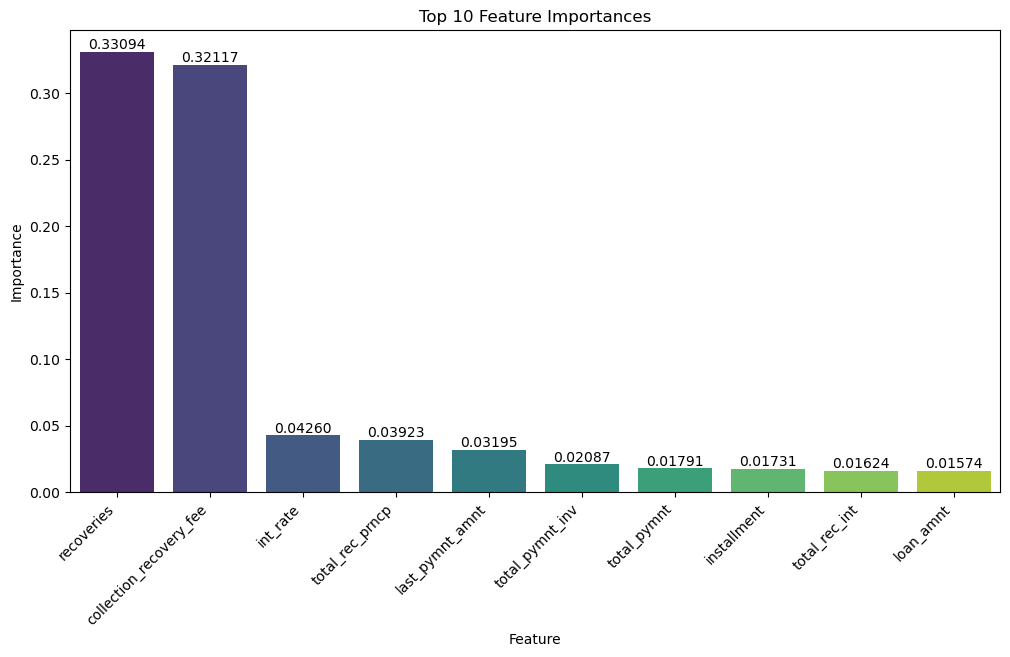

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_10_features = feature_importances.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=top_10_features, palette='viridis')

plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_10_features['Importance']):
    plt.text(index, value, f"{value:.5f}", ha='center', va='bottom')

plt.title('Top 10 Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()



The feature importance analysis reveals that recoveries and collection recovery fees are the most critical variables for predicting loan defaults. These features have the highest impact on the model's ability to accurately identify defaults. Interest rate, total principal repaid, and last payment amount also contribute significantly, though their influence is less pronounced compared to recoveries and fees. Features
 
such as total payment invested, total payment, installment amount, total interest recovered, and loan amount have relatively lower impacts, yet they still provide valuable information for the model. Overall, focusing on recoveries and collection fees will likely yield the most substantial improvements in predicting loan defaults.

## Neural Network Model Performance

A neural network model was implemented to better the prediction of loan defaults. It consisted of two hidden layers with 64 neurons each (ReLU activation) and a final output layer (sigmoid activation). The model was trained for 15 epochs using the Adam optimizer with a mean squared error loss function. 

The neural network model performed very well overall. With high accuracy rates of around 96% on both training and test datasets, it shows strong generalization and classification capability. The F1 score, recall, and precision metrics further highlight the model's effectiveness: it balances precision and recall well, detects a significant proportion of actual charged-off loans, and maintains high precision. 



While the Random Forest model outperforms the neural network slightly in terms of overall accuracy and recall, the neural network's performance remains impressive, demonstrating its strong ability to predict loan defaults.
The graph indicates that the training Mean Squared Error (MSE) decreases as the number of epochs increases. Conversely, the Validation MSE decreases up to approximately 7.5 epochs, reaching a minimum of 0.032. Beyond this point, the Validation MSE remains stable.

In [22]:
from copy import deepcopy

preprocessor_1 = deepcopy(preprocessor)

X_train_preprocessed = preprocessor_1.fit_transform(X_train)
X_test_preprocessed = preprocessor_1.fit_transform(X_test)

In [29]:
# Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = nn_model.fit(X_train_preprocessed, y, epochs=15, batch_size=32, validation_split=0.2)
train_acc = nn_model.evaluate(X_train_preprocessed, y)[1]
test_acc = nn_model.evaluate(X_test_preprocessed, y_test)[1]
print("Neural Network Accuracy - Train:", train_acc)
print("Neural Network Accuracy - Test:", test_acc)

# Predictions
y_train_pred = nn_model.predict(X_train_preprocessed)
y_test_pred = nn_model.predict(X_test_preprocessed)

nn_mae_train = mean_squared_error(y, y_train_pred)
nn_mae_test = mean_squared_error(y_test, y_test_pred)

Epoch 1/20


C:\Users\ckuck\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5652/5652 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9479 - loss: 0.0437 - val_accuracy: 0.9594 - val_loss: 0.0348
Epoch 2/20
5652/5652 ━━━━━━━━━━━━━━━━━━━━ 6s 997us/step - accuracy: 0.9608 - loss: 0.0332 - val_accuracy: 0.9599 - val_loss: 0.0342
Epoch 3/20
5652/5652 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9623 - loss: 0.0324 - val_accuracy: 0.9605 - val_loss: 0.0344
Epoch 4/20
5652/5652 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9633 - loss: 0.0314 - val_accuracy: 0.9605 - val_loss: 0.0334
Epoch 5/20
5652/5652 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9635 - loss: 0.0309 - val_accuracy: 0.9616 - val_loss: 0.0328
Epoch 6/20
5652/5652 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9636 - loss: 0.0312 - val_accuracy: 0.9622 - val_loss: 0.0328
Epoch 7/20
5652/5652 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9638 - loss: 0.0311 - val_accuracy: 0.9620 - val_loss: 0.0325
Epoch 8/20
5652/5652 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9642 - loss: 0.0305 - val_accu

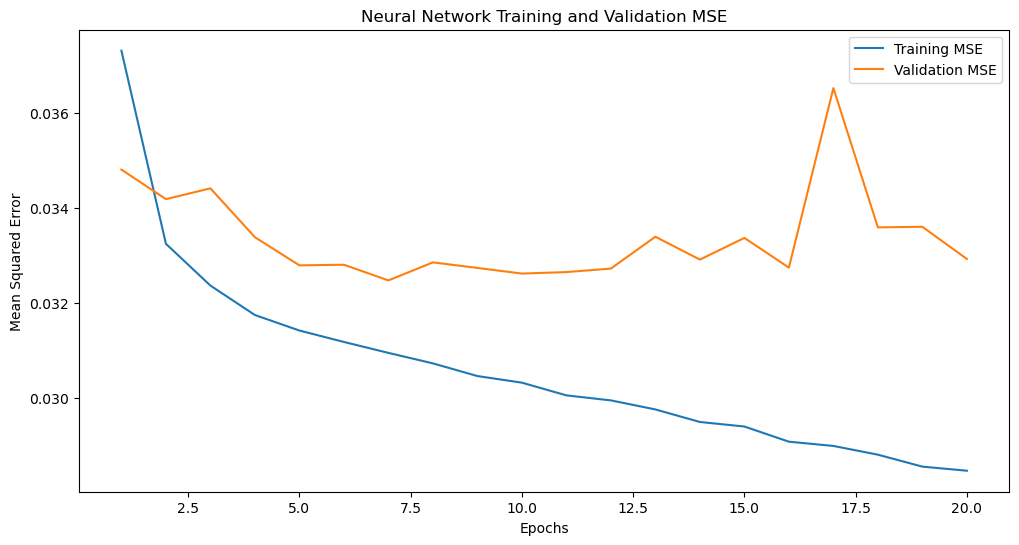

In [32]:
epochs = range(1, 21)
train_mse = history.history['loss']
val_mse = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_mse, label='Training MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.title('Neural Network Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()



In [33]:

nn_predictions_train = (y_train_pred >= 0.5).astype(int)

#  confusion matrix
nn_conf_matrix_train = confusion_matrix(y, nn_predictions_train)

#  F1 score
nn_f1_train = f1_score(y, nn_predictions_train)

#  recall
nn_recall_train = recall_score(y, nn_predictions_train)

nn_precision_train = precision_score(y,nn_predictions_train)

nn_accuracy_train = accuracy_score(y, nn_predictions_train, normalize=True)

print("Confusion Matrix:\n")
print(nn_conf_matrix_train)
print("\nF1 Score:", nn_f1_train)
print("Recall:", nn_recall_train)
print("Precison:", nn_precision_train)
print("Accuracy:", nn_accuracy_train)


Confusion Matrix:

[[199605    360]
 [  7173  18929]]

F1 Score: 0.8340419907030027
Recall: 0.7251934717646158
Precison: 0.9813365130385193
Accuracy: 0.9666780202329398


In [34]:
nn_predictions_test = (y_test_pred >= 0.5).astype(int)

#  confusion matrix
nn_conf_matrix_test = confusion_matrix(y_test, nn_predictions_test)

#  F1 score
nn_f1_test = f1_score(y_test, nn_predictions_test)

#  recall
nn_recall_test = recall_score(y_test, nn_predictions_test)


nn_precision_test = precision_score(y_test,nn_predictions_test)

nn_accuracy_test = accuracy_score(y_test, nn_predictions_test, normalize=True)

print("Confusion Matrix:\n")
print(nn_conf_matrix_test)
print("\nF1 Score:", nn_f1_test)
print("Recall:", nn_recall_test)
print("Precison:", nn_precision_test)
print("Accuracy:", nn_accuracy_test)



Confusion Matrix:

[[198899    964]
 [  7838  18366]]

F1 Score: 0.8066938990644352
Recall: 0.7008853610135857
Precison: 0.9501293326435593
Accuracy: 0.9610646401288113


## Evaluation

In [35]:
import pandas as pd

metrics_dict = {
    "Linear Regression": [lr_mae_test, lr_f1_test, lr_recall_test, lr_precision_test, lr_accuracy_test],
    "Ridge Regression": [rr_mae_test, rr_f1_test, rr_recall_test, rr_precision_test, rr_accuracy_test],
    "Lasso Regression": [lar_mae_test, lar_f1_test, lar_recall_test, lar_precision_test, lar_accuracy_test],
    "Random Forest Regression": [rfr_mae_test, rfr_f1_test, rfr_recall_test, rfr_precision_test, rfr_accuracy_test],
    "Neural Network": [nn_mae_test, nn_f1_test, nn_recall_test, nn_precision_test, nn_accuracy_test],
    
}

metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['MAE', 'F1 Score', 'Recall', 'Precision', 'Accuracy'])

metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

print(metrics_df)


                      Model       MAE  F1 Score    Recall  Precision  Accuracy
0         Linear Regression  0.068633  0.416842  0.264082   0.988854  0.914353
1          Ridge Regression  0.068632  0.416890  0.264120   0.988856  0.914357
2          Lasso Regression  0.071115  0.365924  0.224164   0.995425  0.909951
3  Random Forest Regression  0.028381  0.829782  0.712601   0.993086  0.966112
4            Neural Network  0.032944  0.806694  0.700885   0.950129  0.961065


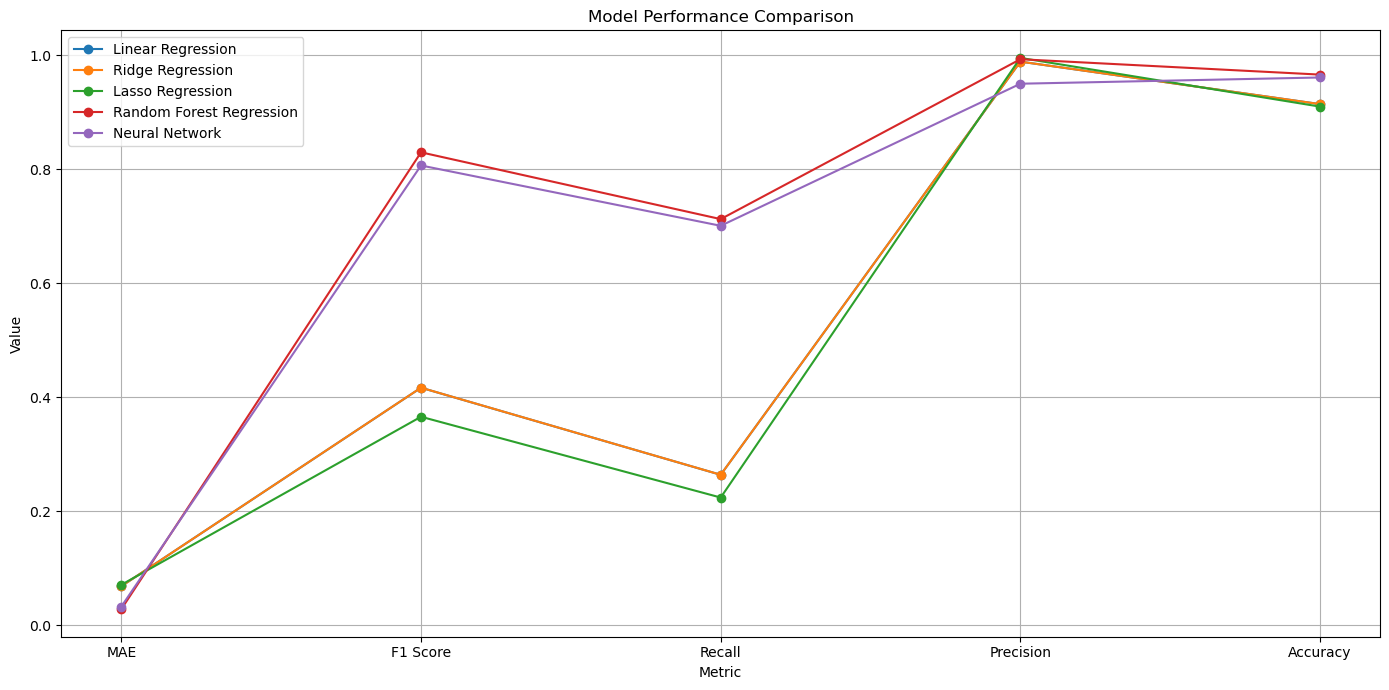

In [18]:

# Plot the metrics with different lines representing different models
plt.figure(figsize=(14, 7))

# Plot each metric for each model as a separate line
for i in range(metrics_df.shape[0]):
    plt.plot(['MAE', 'F1 Score', 'Recall', 'Precision', 'Accuracy'], 
             metrics_df.iloc[i, 1:], 
             marker='o', 
             label=metrics_df.iloc[i, 0])

plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Performance Comparison')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the above table and the figure, Random Forest Regression is the best model. It has the lowest Mean Squared Error (MSE) of 0.028, meaning it makes the less errors on test data. Its F1 score of 0.830 and recall of 0.713 are the highest, showing it effectively identifies both positive and negative cases. With the highest accuracy of 96.6%, it
correctly classifies the most cases. While the Neural Network also performs well, Random Forest is better in overall accuracy and error reduction.


In [27]:
end = time.time()
print("Total time taken:",(end-start)/60)

Total time taken: 39.907572102546695


## Conclusion

This report aimed to predict loan default using various models on a peer-to-peer lending platform dataset. Models included Linear Regression, Ridge Regression, Lasso Regression, Random Forest, and a Neural Network, evaluated by MSE, F1 score, recall, precision, and accuracy.
Among the models, Random Forest Regression performed best, with a 96.6% accuracy, an F1 score of 0.830, and a recall rate of 0.713. This shows Random Forest is very effective at distinguishing charged-off from non-charged-off loans, making it the most reliable model for predicting loan defaults. The Neural Network also performed well, with 96.1% accuracy and an F1 score of 0.807, demonstrating strong prediction and high precision.
In comparison, Linear Regression, Ridge Regression, and Lasso Regression had lower performance, with around 91% accuracy and lower recall and F1 scores, making them less effective at identifying charged-off loans.
In summary, while both Random Forest and Neural Network models are highly capable of predicting loan defaults, Random Forest is slightly superior. However, the Neural Network is also strong with high precision and recall. Future work could optimize these models further through hyperparameter tuning, better feature engineering, and more data to improve their accuracy and effectiveness in credit risk management.